# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically

%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\World Food Fit'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged.csv'))

In [5]:
df.columns

Index(['Unnamed: 0', 'Area', 'Element_x', 'Year', 'Unit_x', 'Value_x',
       'Element_y', 'Months', 'Unit_y', 'Value_y', '_merge'],
      dtype='object')

In [6]:
df.shape

(6213092, 11)

In [7]:
df.isnull().sum()

Unnamed: 0    0
Area          0
Element_x     0
Year          0
Unit_x        0
Value_x       0
Element_y     0
Months        0
Unit_y        0
Value_y       0
_merge        0
dtype: int64

In [8]:
df.head()

,Unnamed: 0,Area,Element_x,Year,Unit_x,Value_x,Element_y,Months,Unit_y,Value_y,_merge
0,0,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Temperature change,January,?C,1.596,both
1,1,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Standard Deviation,January,?C,1.947,both
2,2,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Temperature change,February,?C,-0.881,both
3,3,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Standard Deviation,February,?C,2.590,both
4,4,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Temperature change,March,?C,-0.237,both


In [9]:
df.shape

(6213092, 11)

In [10]:
dups = df.duplicated()

In [11]:
# no dups

dups.shape

(6213092,)

In [13]:
df['Element_x'].value_counts()

Emissions (CO2eq) (AR5)             904264
Emissions (N2O)                     896784
Emissions (CO2eq) from N2O (AR5)    896784
Emissions (CH4)                     754222
Emissions (CO2eq) from CH4 (AR5)    754222
Direct emissions (N2O)              693940
Indirect emissions (N2O)            693940
Emissions (CO2)                     618936
Name: Element_x, dtype: int64

In [14]:
df.drop(columns=['Unnamed: 0','_merge'],inplace=True)

In [15]:
df2=df.groupby(['Element_x','Year'],as_index=False).mean('Value_x')

In [16]:
df2.rename(columns={'Value_x':'emission','Value_y':'temperature'},inplace=True)

In [17]:
df2.head()

,Element_x,Year,emission,temperature
0,Direct emissions (N2O),2000,22.480746,0.672463
1,Direct emissions (N2O),2001,22.656601,0.742463
2,Direct emissions (N2O),2002,23.214713,0.788998
3,Direct emissions (N2O),2003,23.539016,0.753128
4,Direct emissions (N2O),2004,24.237413,0.725571


In [18]:
# export dataframe for further use

df2.to_csv(os.path.join(path,'02 Data','Prepared Data', 'final.csv'))

In [19]:
df2['Year'].value_counts()

2000    8
2001    8
2018    8
2017    8
2016    8
2015    8
2014    8
2013    8
2012    8
2011    8
2010    8
2009    8
2008    8
2007    8
2006    8
2005    8
2004    8
2003    8
2002    8
2019    8
Name: Year, dtype: int64

In [20]:
emCO2=df2.loc[df2['Element_x'] == 'Emissions (CO2)']

In [21]:
emCO2.head()

,Element_x,Year,emission,temperature
40,Emissions (CO2),2000,12238.234018,0.681314
41,Emissions (CO2),2001,10949.431180,0.746267
42,Emissions (CO2),2002,13018.584071,0.790371
43,Emissions (CO2),2003,12238.752860,0.760928
44,Emissions (CO2),2004,13105.522569,0.725422


In [22]:
indiN2O=df2.loc[df2['Element_x'] == 'Indirect emissions (N2O)']

In [23]:
indiN2O.head()

,Element_x,Year,emission,temperature
140,Indirect emissions (N2O),2000,6.721999,0.672463
141,Indirect emissions (N2O),2001,6.766308,0.742463
142,Indirect emissions (N2O),2002,6.938200,0.788998
143,Indirect emissions (N2O),2003,7.033910,0.753128
144,Indirect emissions (N2O),2004,7.236739,0.725571


In [24]:
diN2O=df2.loc[df2['Element_x'] == 'Direct emissions (N2O)']

In [25]:
diN2O.head()

,Element_x,Year,emission,temperature
0,Direct emissions (N2O),2000,22.480746,0.672463
1,Direct emissions (N2O),2001,22.656601,0.742463
2,Direct emissions (N2O),2002,23.214713,0.788998
3,Direct emissions (N2O),2003,23.539016,0.753128
4,Direct emissions (N2O),2004,24.237413,0.725571


In [26]:
CH4=df2.loc[df2['Element_x'] == 'Emissions (CO2eq) from CH4 (AR5)']

In [27]:
CH4.head()

,Element_x,Year,emission,temperature
80,Emissions (CO2eq) from CH4 (AR5),2000,15049.882173,0.674438
81,Emissions (CO2eq) from CH4 (AR5),2001,15145.011218,0.740187
82,Emissions (CO2eq) from CH4 (AR5),2002,15810.818754,0.785797
83,Emissions (CO2eq) from CH4 (AR5),2003,15588.252022,0.752533
84,Emissions (CO2eq) from CH4 (AR5),2004,16086.840658,0.721552


In [28]:
N2O=df2.loc[df2['Element_x'] == 'Emissions (CO2eq) from N2O (AR5)']

In [29]:
N2O.head()

,Element_x,Year,emission,temperature
100,Emissions (CO2eq) from N2O (AR5),2000,7316.777503,0.674260
101,Emissions (CO2eq) from N2O (AR5),2001,7506.319104,0.741204
102,Emissions (CO2eq) from N2O (AR5),2002,7704.619815,0.787067
103,Emissions (CO2eq) from N2O (AR5),2003,7750.504686,0.753642
104,Emissions (CO2eq) from N2O (AR5),2004,7987.294222,0.723385


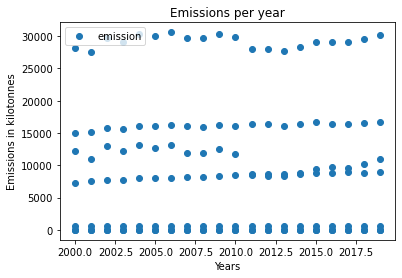

In [30]:
df2.plot (x="Year", y="emission", style="o")
plt.title("Emissions per year")
plt.xlabel("Years")
plt.ylabel("Emissions in kilotonnes")
plt.show()

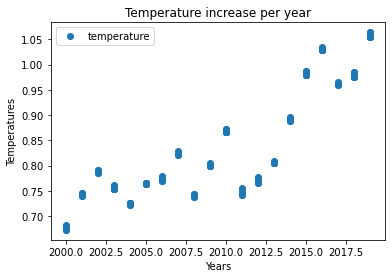

In [31]:
df2.plot (x="Year", y="temperature", style="o")
plt.title("Temperature increase per year")
plt.xlabel("Years")
plt.ylabel("Temperatures")
plt.show()

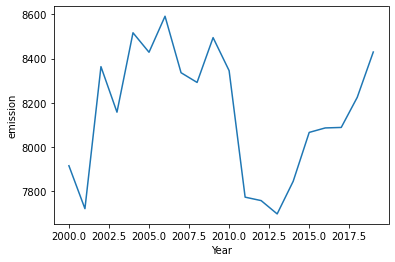

In [32]:
sns.lineplot(x=df2['Year'],y=df2['emission'], ci=None)
plt.savefig('emissionyears.png',dpi=200)
plt.show()

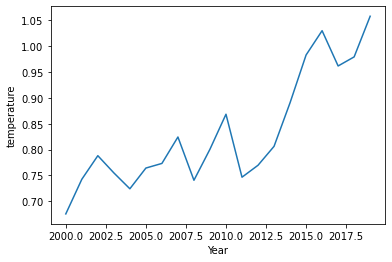

In [33]:
sns.lineplot(x=df2['Year'],y=df2['temperature'], ci=None)
plt.savefig('temperatureyears.png',dpi=200)
plt.show()

# Hypothesis = Temperature rises over years

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

i=CH4['temperature'].values.reshape(-1,1)
J=CH4['emission'].values.reshape(-1,1)

y=emCO2['temperature'].values.reshape(-1,1)
X=emCO2['emission'].values.reshape(-1,1)

a = indiN2O['temperature'].values.reshape(-1,1)
B = indiN2O['emission'].values.reshape(-1,1)

c = diN2O['temperature'].values.reshape(-1,1)
D = diN2O['emission'].values.reshape(-1,1)

e = CH4['temperature'].values.reshape(-1,1)
F = CH4['emission'].values.reshape(-1,1)

g = N2O['temperature'].values.reshape(-1,1)
H = N2O['emission'].values.reshape(-1,1)


In [35]:
X

array([[12238.23401761],
       [10949.4311802 ],
       [13018.58407094],
       [12238.75285956],
       [13105.52256884],
       [12662.04557724],
       [13202.13490307],
       [11981.78651943],
       [11847.86498716],
       [12579.53050263],
       [11765.80582305],
       [ 8458.59683637],
       [ 8408.0410326 ],
       [ 8396.67377637],
       [ 8768.48032659],
       [ 9411.52170088],
       [ 9767.76821258],
       [ 9576.98182232],
       [10198.42960821],
       [10923.98535328]])

In [36]:
y

array([[0.68131399],
       [0.74626663],
       [0.79037056],
       [0.76092808],
       [0.72542203],
       [0.76469298],
       [0.77874566],
       [0.82797889],
       [0.74197892],
       [0.80429234],
       [0.86650442],
       [0.75465692],
       [0.77743847],
       [0.80803105],
       [0.89655879],
       [0.98537045],
       [1.03437885],
       [0.96480548],
       [0.98186433],
       [1.05796084]])

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
# create a regression object

regression = LinearRegression()

In [39]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

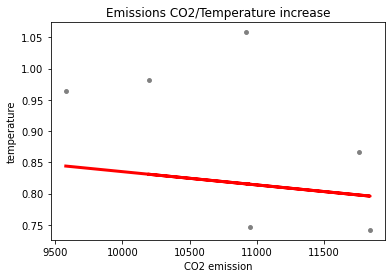

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s = 15)
plot_test.plot(X_test, y_predicted, color = "red", linewidth = 3)
plot_test.title("Emissions CO2/Temperature increase")
plot_test.xlabel("CO2 emission")
plot_test.ylabel("temperature")
plt.savefig('regression.png')
plot_test.show()

## 

In [42]:
# create objects with model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.11598106e-05]]
Mean squared error:  0.01808419900126357
R2 score:  -0.271971712053356


In [44]:
y_predicted

array([[0.83090452],
       [0.81501347],
       [0.8155519 ],
       [0.79600278],
       [0.79773913],
       [0.84405424]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.981864,0.830905
1,0.746267,0.815013
2,1.057961,0.815552
3,0.741979,0.796003
4,0.866504,0.797739
5,0.964805,0.844054
